# Bit Flip Code

In [ ]:
from qiskit import QuantumRegister
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit
from qiskit.providers.basic_provider import BasicProvider
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
from qiskit.visualization import plot_histogram

backend = BasicProvider().get_backend("basic_simulator")

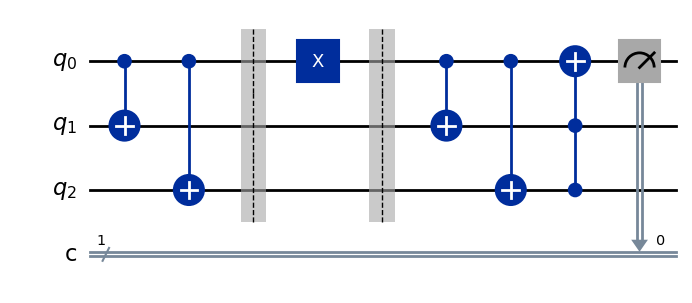

In [3]:
# Bit Flip Code

q = QuantumRegister(3,'q')
c = ClassicalRegister(1,'c')

circuit = QuantumCircuit(q,c)

circuit.cx(q[0],q[1])
circuit.cx(q[0],q[2])
circuit.barrier()

circuit.x(q[0]) #Simulate a bit flip error

circuit.barrier()
circuit.cx(q[0],q[1])
circuit.cx(q[0],q[2])
circuit.ccx(q[2],q[1],q[0])
circuit.measure(q[0],c[0])

circuit.draw(output='mpl')



In [ ]:
result_sim = backend.run(circuit, shots=1024).result()

counts = result_sim.get_counts(circuit)
print(counts)
plot_histogram(counts)


{'0': 1024}


Weiterführende Aufgaben:
- Was passiert, wenn q0 |1> ist?
- Kann der Fehler an jedem der 3 Qubits auftreten und korrigiert werden?
- Wie sieht es aus wenn der Fehler an 2 Qubits auftritt?

# Vom Phase-Flip Fehler zum Bit-Flip Fehler

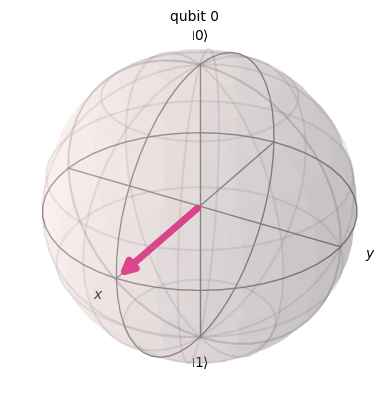

In [13]:
# Phase Flip Fehler
q = QuantumRegister(1,'q')
c = ClassicalRegister(1,'c')

circuit = QuantumCircuit(q,c)

circuit.h(q[0])

statevector = Statevector.from_instruction(circuit)
plot_bloch_multivector(statevector)

Statevector([ 0.70710678+0.j, -0.70710678+0.j],
            dims=(2,))


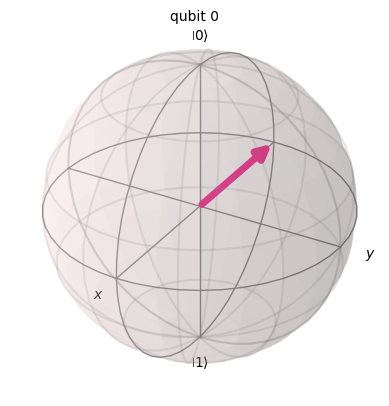

In [14]:
circuit.z(q[0]) # Simulate a phase flip error

statevector = Statevector(circuit)
print(statevector)
plot_bloch_multivector(statevector)

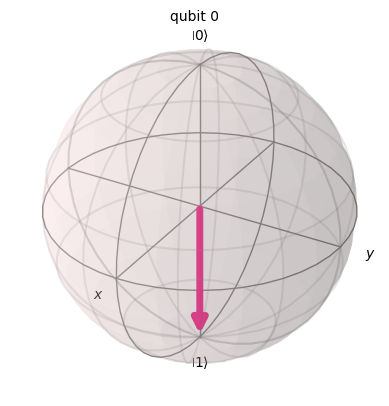

In [15]:
# um phase flip in Messung sichtbar zu machen aus Superposition holen
# dabei wird phase flip zu bit flip
circuit.h(q[0])

statevector = Statevector(circuit)
plot_bloch_multivector(statevector)

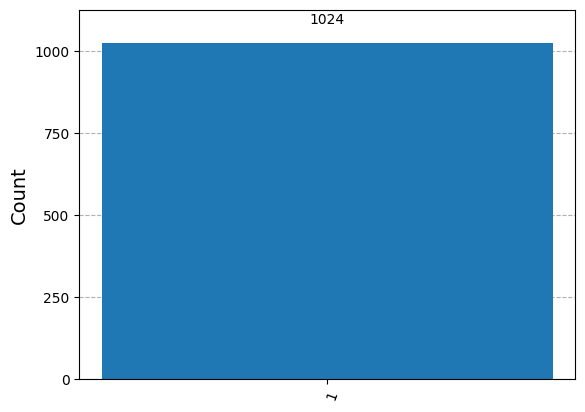

In [16]:
circuit.measure(q[0],c[0])

result_sim = backend.run(circuit, shots=1024).result()
plot_histogram(result_sim.get_counts(circuit))

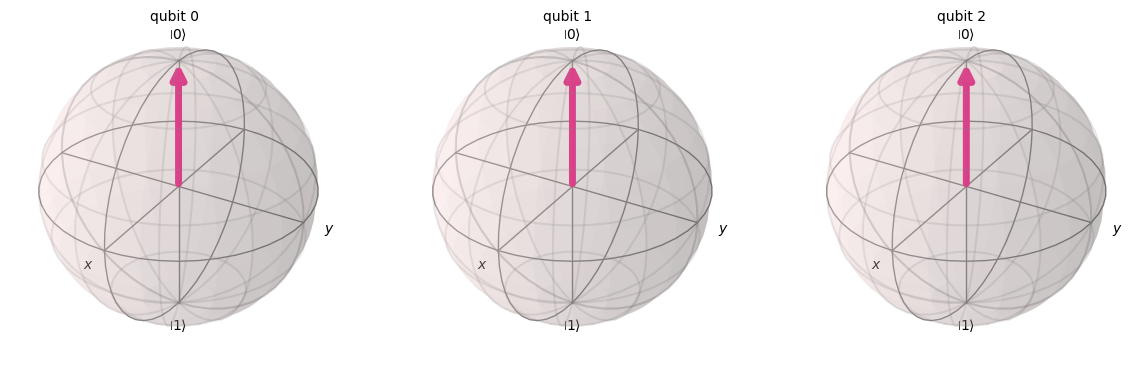

In [ ]:
# Phase Flip Code

q = QuantumRegister(3,'q')
c = ClassicalRegister(3,'c')

circuit = QuantumCircuit(q,c)

statevector = Statevector.from_instruction(circuit)
plot_bloch_multivector(statevector)

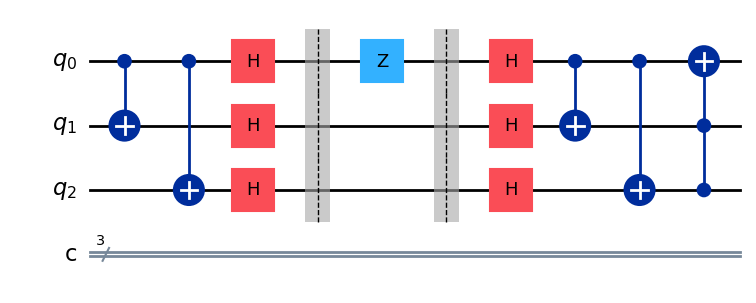

In [178]:
circuit.cx(q[0],q[1])
circuit.cx(q[0],q[2])

circuit.h(q[0])
circuit.h(q[1])
circuit.h(q[2]) 
circuit.barrier()

circuit.z(q[0]) #Simulate a phase flip error

circuit.barrier()
circuit.h(q[0])
circuit.h(q[1])
circuit.h(q[2])

circuit.cx(q[0],q[1])
circuit.cx(q[0],q[2])
circuit.ccx(q[2],q[1],q[0])


circuit.draw(output='mpl')


Statevector([ 6.22328532e-19+0.j,  1.26316153e-34+0.j,  1.92058443e-35+0.j,
              2.36158002e-17+0.j, -1.21839471e-35+0.j,  9.52420783e-18+0.j,
              1.00000000e+00+0.j,  1.90505075e-52+0.j],
            dims=(2, 2, 2))


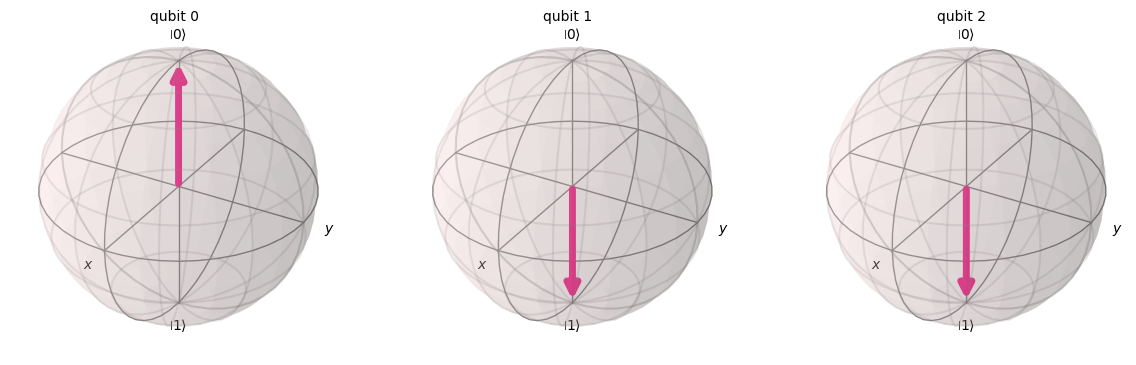

In [179]:
# Display state vector
statevector = Statevector(circuit)
print(statevector)
plot_bloch_multivector(statevector)

{'000': 1024}


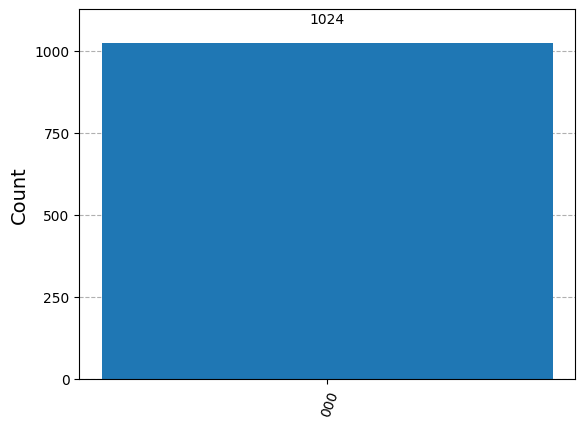

In [180]:
circuit.measure(q[0],c[0])
result_sim = backend.run(circuit, shots=1024).result()

counts = result_sim.get_counts(circuit)
print(counts)
plot_histogram(counts)

Weiterführende Fragen:
- Was passiert, wenn q0 |1> ist?
- Kann der Fehler an jedem der 3 Qubits auftreten und korrigiert werden?
- Kann der Fehler an 2 Qubits korrigiert werden?
- **Können beide Fehlerarten gleichzeitig korrigiert werden?**